In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [10]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [11]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
print(calc_temps('2016-01-01','2016-12-31'))

[(56.0, 74.14421827631008, 84.0)]


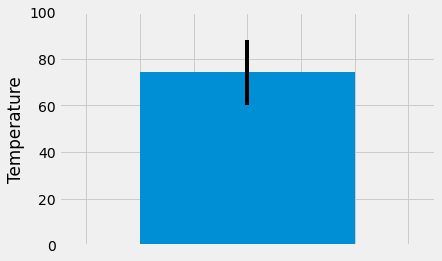

In [39]:
# Plot the results from your previous query as a bar chart. 
result=calc_temps('2016-01-01','2016-12-31')
tmin=result[0][0]
tave=result[0][1]
tmax=result[0][2]
# Use "Trip Avg Temp" as your Title
plt.bar(1,tave,width=0.8,yerr=(tmax-tmin)/2)
plt.ylabel("Temperature")
plt.xlim(0.3,1.7)
plt.ylim(0,100)
plt.tick_params(labelbottom=False)
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

### Daily Rainfall Average

In [58]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
df = pd.read_csv('hawaii_measurements.csv')
df['date']= pd.to_datetime(df['date'])
df=df.set_index('date')
df=df[df.index.date() >= dt.date(2017, 8, 1)]
df.head()



TypeError: Invalid comparison between dtype=datetime64[ns] and date

In [30]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:
# calculate the daily normals for your trip

# push each tuple of calculations into a list called `normals`
normals=[]
# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'
start_date_time = dt.datetime.strptime(start_date, '%Y-%m-%d').date()
end_date_time = dt.datetime.strptime(end_date, '%Y-%m-%d').date()
# Use the start and end date to create a range of dates
range_of_dates=[start_date_time]
current_date=start_date_time
while current_date != end_date_time:
    current_date=current_date+dt.timedelta(1)
    range_of_dates.append(current_date)

# Strip off the year and save a list of strings in the format %m-%d
liststrings=[]
for thisdate in range_of_dates:
    liststrings.append(thisdate.strftime("%m-%d"))
liststrings
# Use the `daily_normals` function to calculate the normals for each date string 
normals = []
for datestring in liststrings:
    normals.append(daily_normals(datestring))
# and append the results to a list called `normals`.
normals

[[(67.0, 75.54, 83.0)],
 [(68.0, 75.60377358490567, 84.0)],
 [(70.0, 76.61111111111111, 85.0)],
 [(69.0, 76.71153846153847, 84.0)],
 [(69.0, 76.14814814814815, 82.0)],
 [(67.0, 76.25, 83.0)],
 [(71.0, 77.15686274509804, 83.0)]]

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session